In [30]:
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

In [92]:
X,y = make_blobs(n_samples = 50,centers = 2,random_state=0,cluster_std = 0.6)

In [93]:
y[3]

0

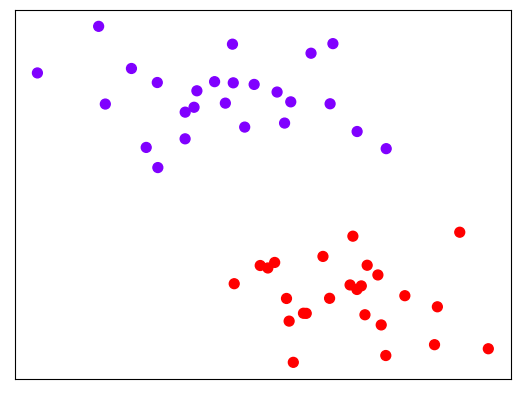

In [94]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='rainbow')
ax = plt.gca()
plt.xticks([])
plt.yticks([])
plt.show()

In [95]:
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xlim ,ylim

((-0.7425578984849813, 3.3721920271976598),
 (-0.41872382476349596, 5.754870487889891))

In [96]:
#在起始点和终结点取得30个数目
axisx = np.linspace(xlim[0],xlim[1],30)
axisy = np.linspace(ylim[0],ylim[1],30)
#复制
axisx,axisy = np.meshgrid(axisy,axisy)

axisx.shape
axisy.shape

#匹配,在平面中均匀地规划出点 使用transpose
xy = np.vstack([axisx.ravel(),axisy.ravel()]).T
#plt.scatter(xy[:,0],xy[:,1],s=1,cmap='rainbow')

# 建模

In [97]:
clf = SVC(kernel = 'linear').fit(X,y)
Z = clf.decision_function(xy).reshape(axisx.shape)
Z.shape

(30, 30)

(-0.41872382476349596, 5.754870487889891)

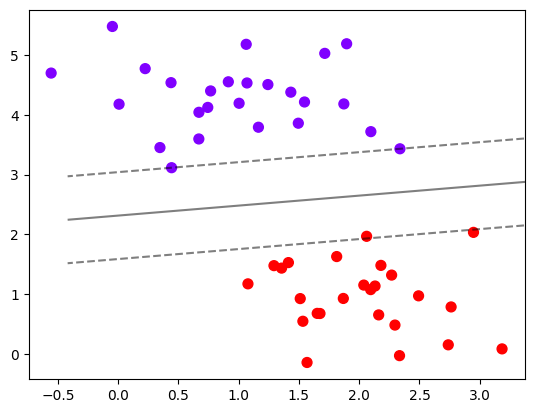

In [98]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='rainbow')
ax = plt.gca()
#决策边界和平行于决策边界的超平面
ax.contour(axisx,axisy,Z,
          colors = 'k',
          levels=[-1,0,1],
          alpha = 0.5,
          linestyles = ['--','-','--'])
ax.set_xlim(xlim)
ax.set_ylim(ylim)


[1.71444449 5.02521524]


C:\Users\fakenews\AppData\Local\Temp\ipykernel_29380\2257124234.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[10,0],X[10,1],c='black',s=50,cmap='rainbow')


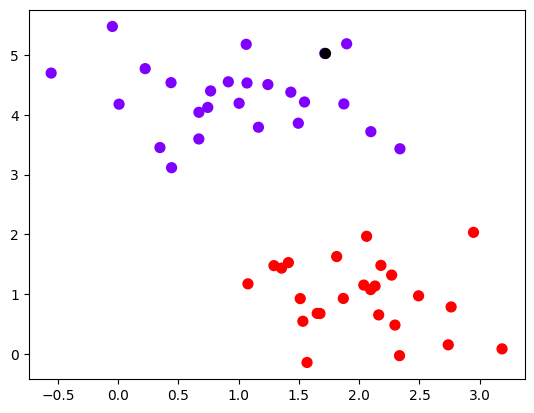

In [99]:
print(X[10])
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plt.scatter(X[10,0],X[10,1],c='black',s=50,cmap='rainbow')

[-3.33917354]


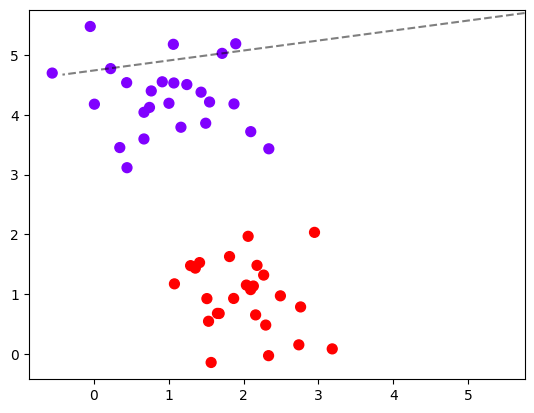

In [100]:
clf.decision_function(X[10].reshape(1,2))
print(clf.decision_function(X[10].reshape(1,2)))
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='rainbow')
ax = plt.gca()
ax.contour(axisx,axisy,Z,
          colors = 'k',
          levels=[-3.33917354],
          alpha = 0.5,
          linestyles = ['--','-','--'])

# 可视化过程封装

In [103]:
def plot_svc_decision_function(model,ax=None):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    x = np.linspace(xlim[0],xlim[1],30)
    y = np.linspace(ylim[0],ylim[1],30)
    Y,X = np.meshgrid(y,x)
    xy = np.vstack([X.ravel(),Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    ax.contour(X,Y,P,
          colors = 'k',
          levels=[-1,0,1],
          alpha = 0.5,
          linestyles = ['--','-','--'])
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

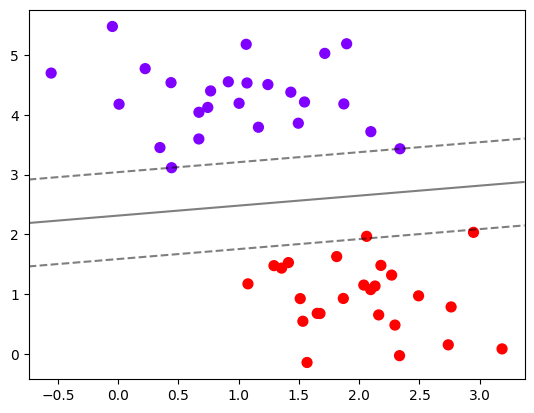

In [104]:
clf =  SVC(kernel = 'linear').fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap = 'rainbow')
plot_svc_decision_function(clf)

# 模型的运用

In [105]:
#根据决策边界 对X中的样本进行分类，返回的结构为n_sample
clf.predict(X)

#返回给定测试数据和标签的平均准确度
clf.score(X,y)

#返回支持向量
clf.support_vectors_

#返回不同类别中支持向量的个数
clf.n_support_


array([2, 1])

# 环形数据

In [106]:
from sklearn.datasets import make_circles
X,y = make_circles(100,factor=0.1,noise =.1)



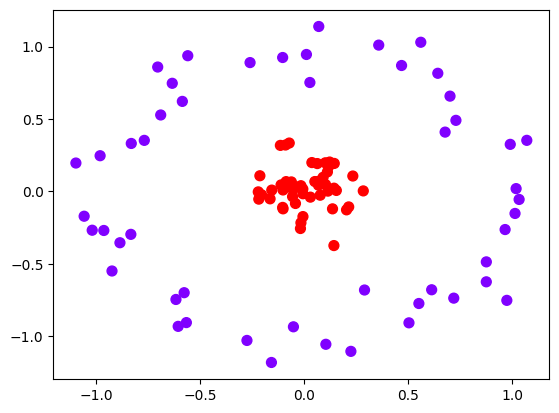

In [107]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='rainbow')


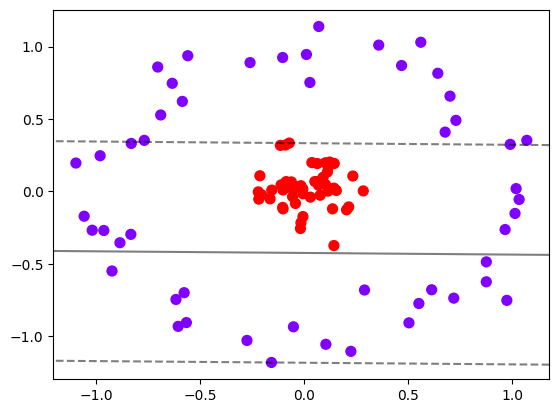

In [108]:
clf =  SVC(kernel = 'linear').fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap = 'rainbow')
plot_svc_decision_function(clf)

# Test Ground